<a href="https://colab.research.google.com/github/Obad00/Billets/blob/main/a1%20Travail_1_Neural_game_of_life_trou%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Game Of Life

Comblez le code manquant pour compléter le Jeu de la vie.

La version finale doit être exécutable en 2 modes: standard et neuronale.

Ainsi, vous devez prévoir 2 fonctions "voisins", qui compte le nombre de voisins d'une cellule.

Dans le jeu de la vie, simplement changer la valeur de la variable "mode" pour passer d'un mode à l'autre.

MODE_STANDARD = 0

MODE_NEURAL = 1

**mode = MODE_STANDARD   # Ou MODE_NEURAL**

*Peut importe les points finaux, vous ne pouvez pas avoir une note supérieure à 9/15 si AUCUN de vos modes ne fonctionne bien.*




## RND - MLP

(7 points)

In [27]:
# Importation des bibliothèques
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# 1 POINT
# Initialisation du générateur de nombres aléatoires
# Doit assurer la reproductibilité
np.random.seed(42)
random.seed(42)

In [29]:
# 1 POINT
# Générer 100 données avec 8 caractéristiques binaires et la caractéristique cible (somme des caractéristiques binaires)
def generer_donnees(nb_echantillons=100, nb_caracteristiques=8):
    X = np.random.randint(0, 2, size=(nb_echantillons, nb_caracteristiques))
    y = np.sum(X, axis=1)  # La cible est la somme des voisins vivants
    return X, y

X, y = generer_donnees()

In [30]:
# 1 POINT
# Diviser les données en ensembles d'entraînement et de test (X_train, X_test, Y_train, Y_test)
# 80% pour l'entraînement et 20% pour les tests.
# Assurer la reproductibilité
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# 1 POINT
# Créer le modèle MLPRegressor nommé mlp, 1 couche cachée avec 8 neurones. Reproductible, Maximum 1000 itérations d'apprentissage.
# 1 POINT
# Entraîner le modèle sur les données d'entraînement
def creer_et_entrainer_mlp(X_train, y_train):
    modele = MLPRegressor(hidden_layer_sizes=(8,), max_iter=1000, random_state=42)
    modele.fit(X_train, y_train)
    return modele

mlp = creer_et_entrainer_mlp(X_train, y_train)

In [32]:
# 1 POINT
# Entraîner le modèle sur les données d'entraînement
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(8,), max_iter=1000, random_state=42)

In [33]:
# 1 POINT
# Faire des prédictions sur les données de test.
y_pred = mlp.predict(X_test)

In [34]:
# 1 POINT
# Calculer et afficher l'erreur quadratique moyenne (MSE) et coefficient de détermination R^2 (le score)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"""
Évaluation du modèle :
-------------------------
Erreur quadratique moyenne (MSE) : {mse:.4f}
Score R² : {r2:.4f}
""")


Évaluation du modèle :
-------------------------
Erreur quadratique moyenne (MSE) : 0.0203
Score R² : 0.9884



In [16]:
# Tester individuellement le model avec .predict.
# Le paramètre est un tableau 2 dimensions qui contient 1 ligne, et 8 caractéristiques valant 0 ou 1.
# Le résultat doit donner une bonne approximation du nombre de voisins.
# Arrondi des prédictions pour obtenir un nombre entier de voisins
def tester_mlp(modele, test_cases):
    print("\n Test du modèle sur différentes combinaisons de voisins :\n")
    for test in test_cases:
        prediction = modele.predict([test])[0]
        print(f" Entrée: {test}  |  Prédiction MLP: {prediction:.2f}")
test_cases = [
    [i, j, k, l, m, n, o, p]
    for (i, j, k, l, m, n, o, p) in [
        (0,0,0,0,0,0,0,0),
        (0,0,1,0,0,0,0,0),
        (0,0,0,1,0,1,0,0),
        (0,1,0,1,1,0,0,0),
        (1,0,1,0,1,0,1,0),
        (0,1,1,0,1,1,1,0),
        (1,1,0,1,1,1,0,1),
        (1,1,1,1,0,1,1,1),
        (1,1,1,1,1,1,1,1),
    ]
]

# Exécution des tests
tester_mlp(mlp, test_cases)


Entrée: [0, 0, 0, 0, 0, 0, 0, 0] => Prédiction MLP (arrondie): 0
Entrée: [0, 0, 1, 0, 0, 0, 0, 0] => Prédiction MLP (arrondie): 1
Entrée: [0, 0, 0, 1, 0, 1, 0, 0] => Prédiction MLP (arrondie): 2
Entrée: [0, 1, 0, 1, 1, 0, 0, 0] => Prédiction MLP (arrondie): 3
Entrée: [1, 0, 1, 0, 1, 0, 1, 0] => Prédiction MLP (arrondie): 4
Entrée: [0, 1, 1, 0, 1, 1, 1, 0] => Prédiction MLP (arrondie): 5
Entrée: [1, 1, 0, 1, 1, 1, 0, 1] => Prédiction MLP (arrondie): 6
Entrée: [1, 1, 1, 1, 0, 1, 1, 1] => Prédiction MLP (arrondie): 7
Entrée: [1, 1, 1, 1, 1, 1, 1, 1] => Prédiction MLP (arrondie): 8


Ceci termine votre modèle de RDN - MLP. Assurez-vous qu'il soit fonctionnel avant de l'appeler dans le jeu de la vie.

## Jeu de la vie

(8 points)

In [1]:
# Importation des librairies.
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [2]:
# Déclaration des constantes
MORT = 0
VIVANT = 1
TAILLE = 100
NB_GENERATION = 60
MODE_STANDARD = 0
MODE_NEURAL = 1

# Assignez mode à MODE_STANDARD ou MODE_NEURAL, selon le mode d'exécution attendu.
mode = MODE_STANDARD

In [3]:
# 1 POINT
# Initialisation de toutes les cellules de la grille à des 0 ou des 1.
# Une seule instruction requise.
# Nommez la variable (un tableau 2d): grille
def initialiser_grille(taille):
    return np.random.randint(0, 2, (taille, taille))
grille = initialiser_grille(TAILLE)

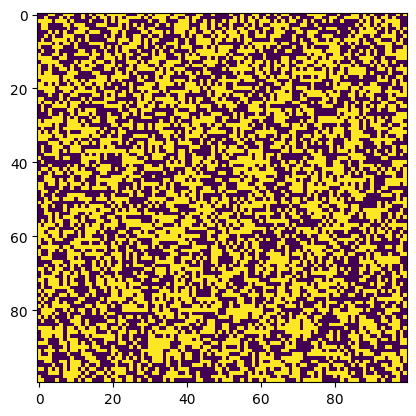

In [4]:
# Affiche le graphique
fig, ax = plt.subplots()
im = plt.imshow(grille);

In [5]:
# 2 POINTS
# Foncion "voisin" qui compte et retourne le nombre de voisins.
# C'est la fonction appellée par le mode MODE_STANDARD.
# Elle recoit i,j la position de la cellule dans la grille ou il faut compter le nombre de voisin (VIVANT)

def compter_voisins(grille, i, j):
    voisins = [
        grille[i + x, j + y]
        for x in [-1, 0, 1] for y in [-1, 0, 1]
        if (x, y) != (0, 0) and 0 <= i + x < TAILLE and 0 <= j + y < TAILLE
    ]
    return sum(voisins)

In [6]:
# 2 POINTS
# Foncion "voisin_mlp" qui compte et retourne le nombre de voisins, mais en mode MODE_NEURAL.
# Elle compte le nombre de voisin en faisant appel à la fonction mlp.predict() du modèle entraîné plus haut.
# Elle recoit i,j la position de la cellule dans la grille ou il faut compter le nombre de voisin (VIVANT)

def compter_voisins_mlp(grille, i, j, mlp):
    voisins_binaires = [
        1 if (0 <= i + x < TAILLE and 0 <= j + y < TAILLE and grille[i + x, j + y] == VIVANT) else 0
        for x in [-1, 0, 1] for y in [-1, 0, 1] if (x, y) != (0, 0)
    ]
    return round(mlp.predict([voisins_binaires])[0])



In [7]:
# 3 POINTS
# Calcul la génération de cellules suivante
def generer_nouvelle_grille(grille, mlp=None):
    nouvelle_grille = grille.copy()
    for i in range(TAILLE):
        for j in range(TAILLE):
            nb_voisins = (
                compter_voisins(grille, i, j)
                if mode == MODE_STANDARD
                else compter_voisins_mlp(grille, i, j, mlp)
            )

            if grille[i, j] == VIVANT and (nb_voisins < 2 or nb_voisins > 3):
                nouvelle_grille[i, j] = MORT
            elif grille[i, j] == MORT and nb_voisins == 3:
                nouvelle_grille[i, j] = VIVANT
    return nouvelle_grille

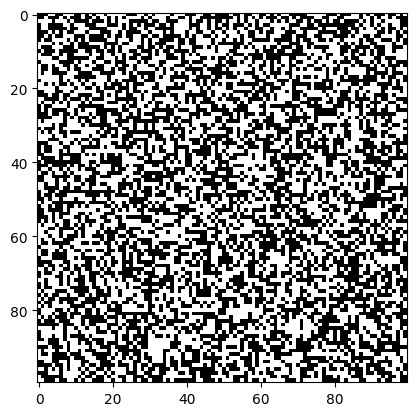

In [8]:
# Autres instructions importantes pour la mise à jour du tableau et la gestion de l'animation

# Fonction d'initialisation de l'animation
fig, ax = plt.subplots()
image = ax.imshow(grille, cmap="gray")

def mise_a_jour(_):
    global grille
    grille = generer_nouvelle_grille(grille)
    image.set_array(grille)
    return [image]

ani = animation.FuncAnimation(fig, mise_a_jour, frames=NB_GENERATION, interval=100)
plt.show()

